In [20]:
import numpy as np
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras_core as keras
import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

### Load Data

In [21]:
train_data = pd.read_csv("mnist_train.zip")
train_data

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_train= train_data.iloc[:,1:].to_numpy()
Y_train = train_data.iloc[:,0].to_numpy()

In [23]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
Y_train

array([0, 4, 1, ..., 5, 6, 8])

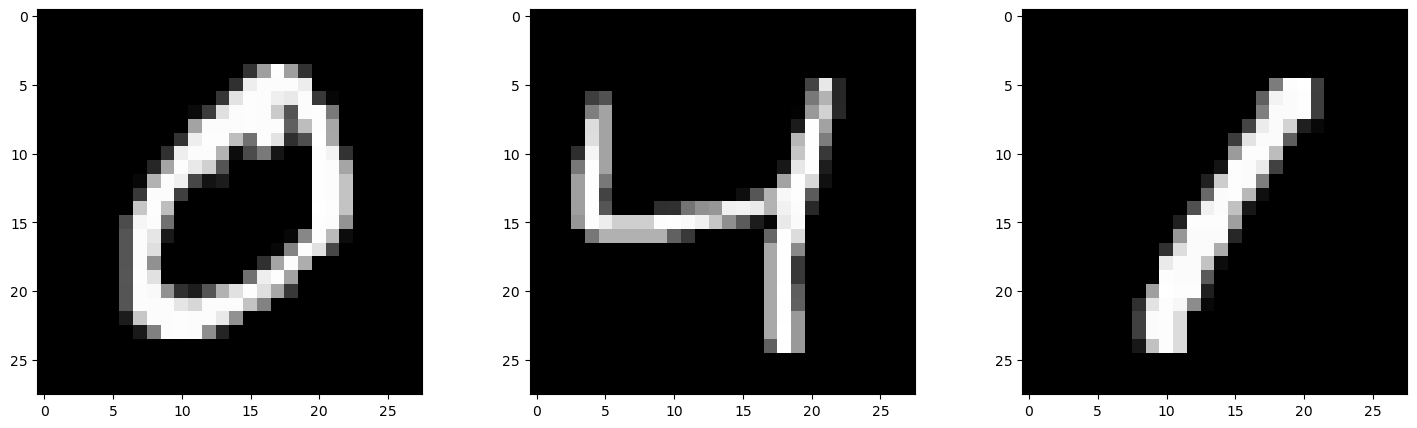

In [25]:
plt.figure(figsize=(18,5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.axis(True)
    plt.imshow(np.reshape(X_train[i], (28, 28)), cmap="gray")
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

### Data Preprocessing

In [26]:
## Normalize X_data
X_train = X_train.astype("float32") / 255
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
## One-Hot Encoding
Y_train = keras.utils.to_categorical(Y_train)
Y_train

array([[[1., 0.],
        [1., 0.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       ...,

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]])

: 

###  Split data 


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

### Normalize Data

In [30]:
X_train = X_train.astype("float32") / 255
X_valid = X_valid.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [31]:
### Convert the label to categorical format
Y_train = keras.utils.to_categorical(Y_train)
Y_valid = keras.utils.to_categorical(Y_valid)
Y_test = keras.utils.to_categorical(Y_test)

In [32]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

### Building the Model

In [34]:
## define the MLP model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)               │    100,480 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 128)               │     16,512 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 10)                │      1,290 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### Compile Model

In [35]:
model.compile(
loss = keras.losses.CategoricalCrossentropy(),
optimizer = keras.optimizers.Adam(learning_rate=0.001),
metrics=[keras.metrics.CategoricalAccuracy(name="acc")]
)

### Train Model

In [36]:
batch_size = 128
epochs = 50

train_state = model.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_valid, Y_valid)
)

Epoch 1/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3270 - loss: 2.0564 - val_acc: 0.7014 - val_loss: 0.9260
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.7352 - loss: 0.8378 - val_acc: 0.8076 - val_loss: 0.6279
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8209 - loss: 0.5955 - val_acc: 0.8530 - val_loss: 0.5061
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8572 - loss: 0.4895 - val_acc: 0.8743 - val_loss: 0.4389
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8762 - loss: 0.4280 - val_acc: 0.8863 - val_loss: 0.3983
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8884 - loss: 0.3818 - val_acc: 0.8887 - val_loss: 0.3769
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8979 - loss: 0.3470 - val_acc: 0.8968 - val_loss: 0.3552
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9049 - loss: 0.3339 - val_acc: 0.9005 - val_loss: 0.3386
Epoch 9/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

### Evaluation With ROC-AUC

In [37]:
def calculate_roc_auc(model, X_test, Y_test):
    Y_test_labels = np.argmax(Y_test, axis=1)
    Y_pred_probs = model.predict(X_test)
    
    roc_auc_scores = {}
    for digit in range(10):
        binary_labels = (Y_test_labels == digit).astype(int)
        roc_auc = roc_auc_score(binary_labels, Y_pred_probs[:, digit])
        roc_auc_scores[digit] = roc_auc
    return roc_auc_scores

In [38]:
roc_auc_scores = calculate_roc_auc(model, X_test, Y_test)

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step      


In [39]:
for digit, auc in roc_auc_scores.items():
    print(f"Digit {digit}: ROC-AUC = {auc:.4f}")

Digit 0: ROC-AUC = 0.9999
Digit 1: ROC-AUC = 0.9995
Digit 2: ROC-AUC = 0.9974
Digit 3: ROC-AUC = 0.9973
Digit 4: ROC-AUC = 0.9991
Digit 5: ROC-AUC = 0.9976
Digit 6: ROC-AUC = 0.9994
Digit 7: ROC-AUC = 0.9994
Digit 8: ROC-AUC = 0.9971
Digit 9: ROC-AUC = 0.9959


### Visualazing the results

In [40]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, epochs])
    plt.ylim(ylim)
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

In [41]:
train_loss = train_state.history["loss"]
train_acc  = train_state.history["acc"]
valid_loss = train_state.history["val_loss"]
valid_acc  = train_state.history["val_acc"]

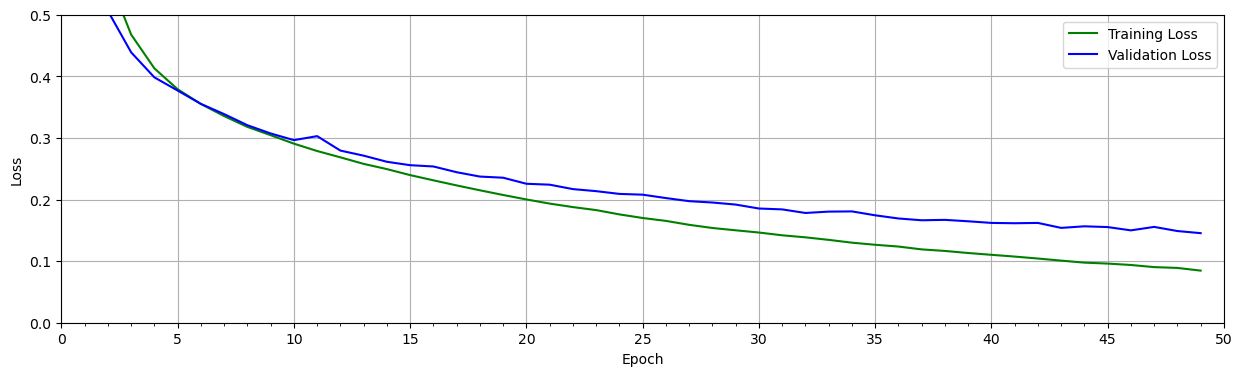

In [42]:
plot_results([train_loss, valid_loss],        
            ylabel="Loss", 
            ylim = [0.0, 0.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

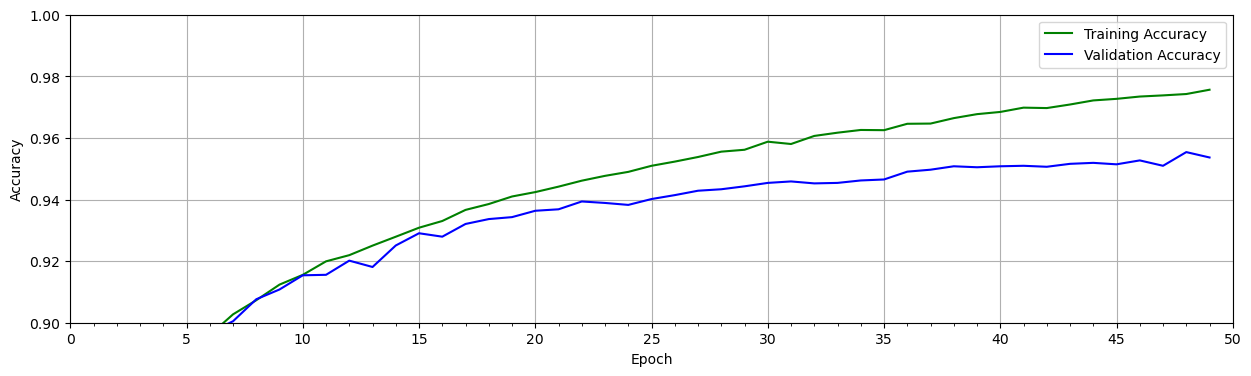

In [43]:
plot_results([train_acc, valid_acc], 
            ylabel="Accuracy",
            ylim = [0.9, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"]);